In [1]:
"""
examples of the whole pipeline with several images

"""
import logging

%load_ext autoreload
%autoreload 2

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [2]:
"""
Read in + display images + masks

"""

import os
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=3)

# Which indices mark the end of a stack from the same sample
endpoints = [107, 215, 315, 515]

n_imgs = 4
indices = np.concatenate(
    [
        rng.integers(start, end, size=n_imgs)
        for start, end in zip([0, *endpoints[:3]], endpoints)
    ]
)

mask_paths = [f"data/masks cut/{index:04}.tif" for index in indices]
image_paths = [f"data/original cut/{index:04}.tif" for index in indices]

for mask, image in zip(mask_paths, image_paths):
    assert os.path.exists(mask)
    assert os.path.exists(image)

masks = [plt.imread(mask) for mask in mask_paths]
images = [plt.imread(image) for image in image_paths]

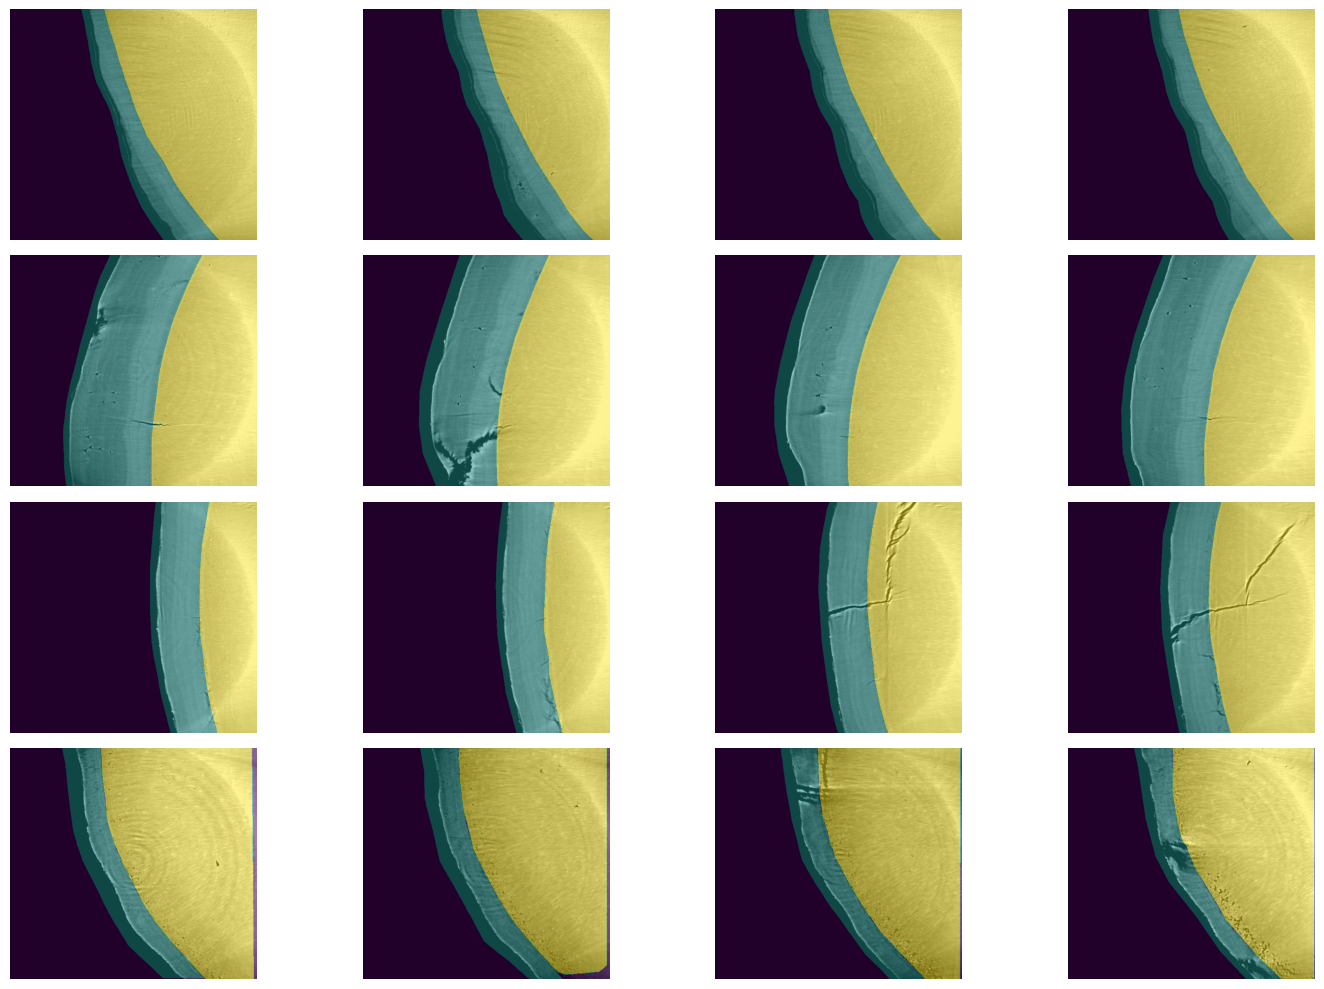

In [3]:
fig, axes = plt.subplots(n_imgs, 4, figsize=(15, 10))

for axis, image, mask in zip(axes.flat, images, masks):
    axis.imshow(image, cmap="gray")
    axis.imshow(mask, cmap="viridis", alpha=0.5)
    axis.set_axis_off()

fig.tight_layout()

INFO:root:Mask is valid
INFO:root:Mask is valid
INFO:root:Mask is valid
INFO:root:Mask is valid
INFO:root:Mask is invalid: correcting
INFO:root:Mask is valid
INFO:root:Mask is valid
INFO:root:Mask is invalid: correcting
INFO:root:Mask is valid
INFO:root:Mask is valid
INFO:root:Mask is valid
INFO:root:Mask is valid
INFO:root:Mask is invalid: correcting
INFO:root:Mask is invalid: correcting
INFO:root:Mask is invalid: correcting
INFO:root:Mask is invalid: correcting


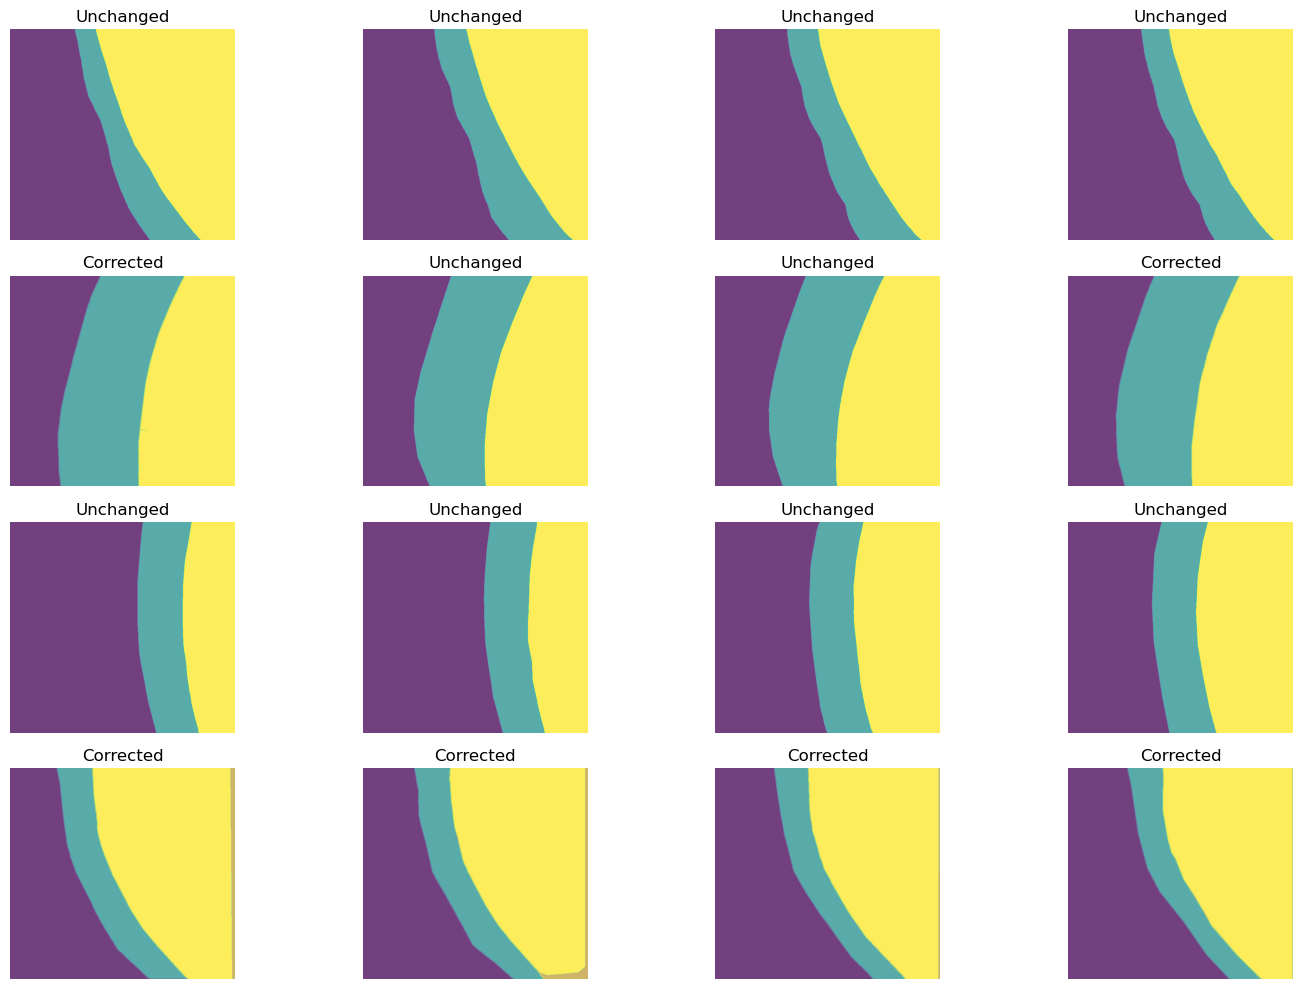

In [4]:
"""
Correct any of these masks

"""

from cementum import correct_mask

fig, axes = plt.subplots(n_imgs, 4, figsize=(15, 10))

corrected_masks = []
for axis, mask in zip(axes.flat, masks):
    axis.imshow(mask, alpha=0.5)

    corrected_mask = correct_mask.correct_mask(mask, kernel_size=5, verbose=True)
    corrected_masks.append(corrected_mask)

    if (mask == corrected_mask).all():
        axis.set_title("Unchanged")
    else:
        axis.set_title("Corrected")
    axis.set_axis_off()

    axis.imshow(corrected_mask, cmap="viridis", alpha=0.5)

fig.tight_layout()

In [5]:
"""
Straighten

"""
from tqdm import tqdm

from cementum import straighten
n_y = 50
n_x = 5, 5, 5

curved_meshes = []
straight_meshes = []

for mask in tqdm(corrected_masks):
    curved_mesh = straighten.mask_mesh(mask, n_y, n_x)
    curved_meshes.append(curved_mesh)

    straight_mesh = straighten.straight_mesh(mask, n_y, n_x)
    straight_meshes.append(straight_mesh)

100%|██████████| 16/16 [00:00<00:00, 28.58it/s]


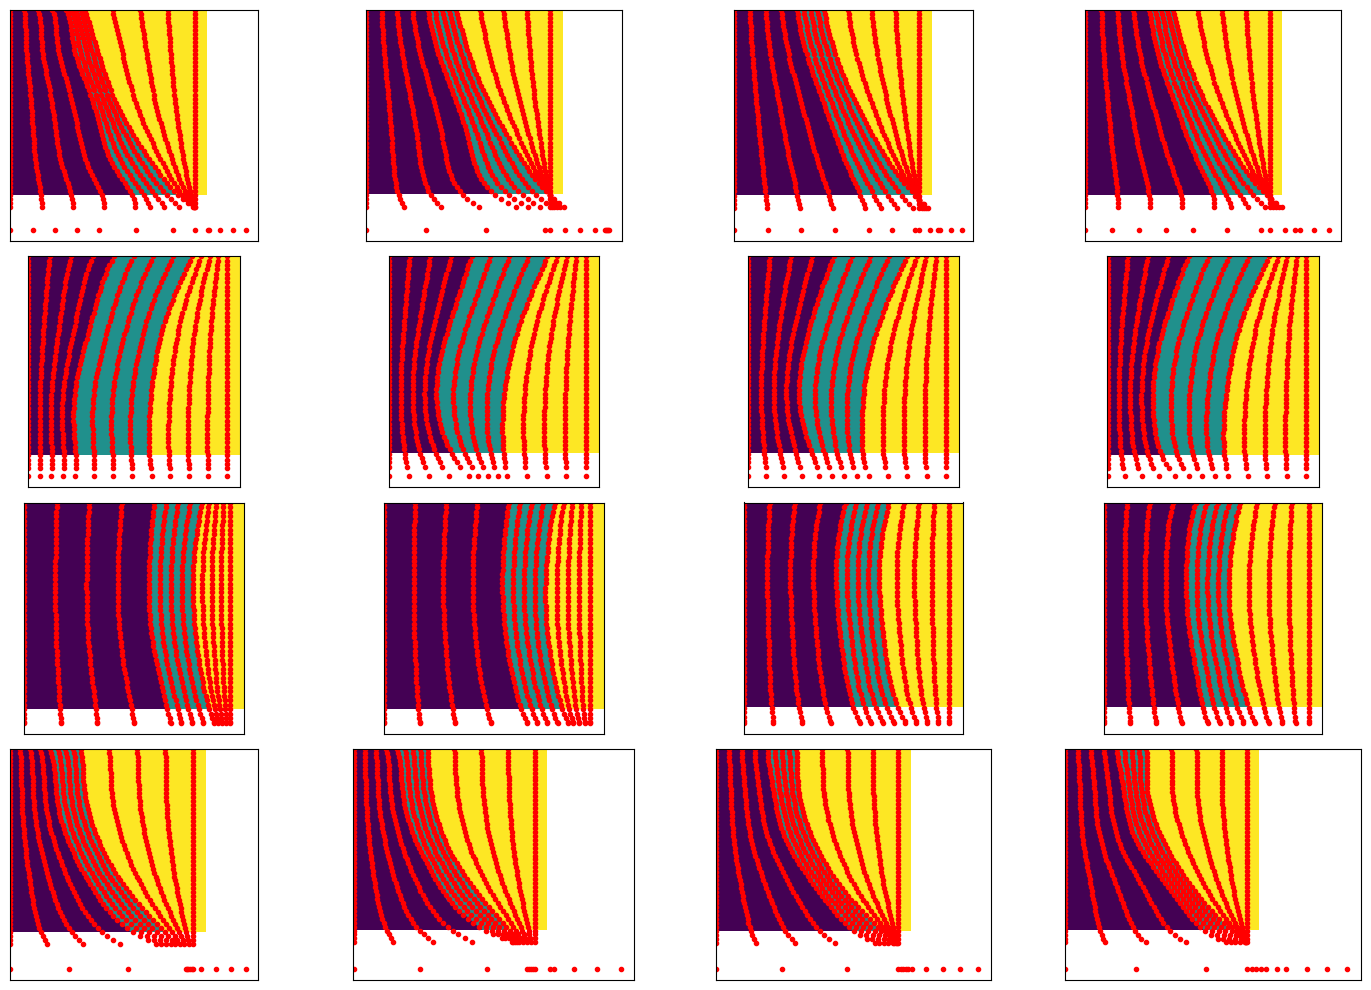

In [6]:
fig, axes = plt.subplots(n_imgs, 4, figsize=(15, 10))

for axis, mask, curved_mesh, straight_mesh in zip(
    axes.flat, corrected_masks, curved_meshes, straight_meshes
):
    axis.imshow(mask, cmap="viridis")
    axis.plot(curved_mesh[:, 0], curved_mesh[:, 1], "r.")
    axis.set_xticks([]) 
    axis.set_yticks([]) 

fig.tight_layout()

In [7]:
straight_images = []

for image, curve_mesh, straight_mesh in tqdm(
    zip(images, curved_meshes, straight_meshes), total=len(images)
):
    straight_image = straighten.apply_transformation(image, curve_mesh, straight_mesh)
    straight_images.append(straight_image)

100%|██████████| 16/16 [00:35<00:00,  2.20s/it]


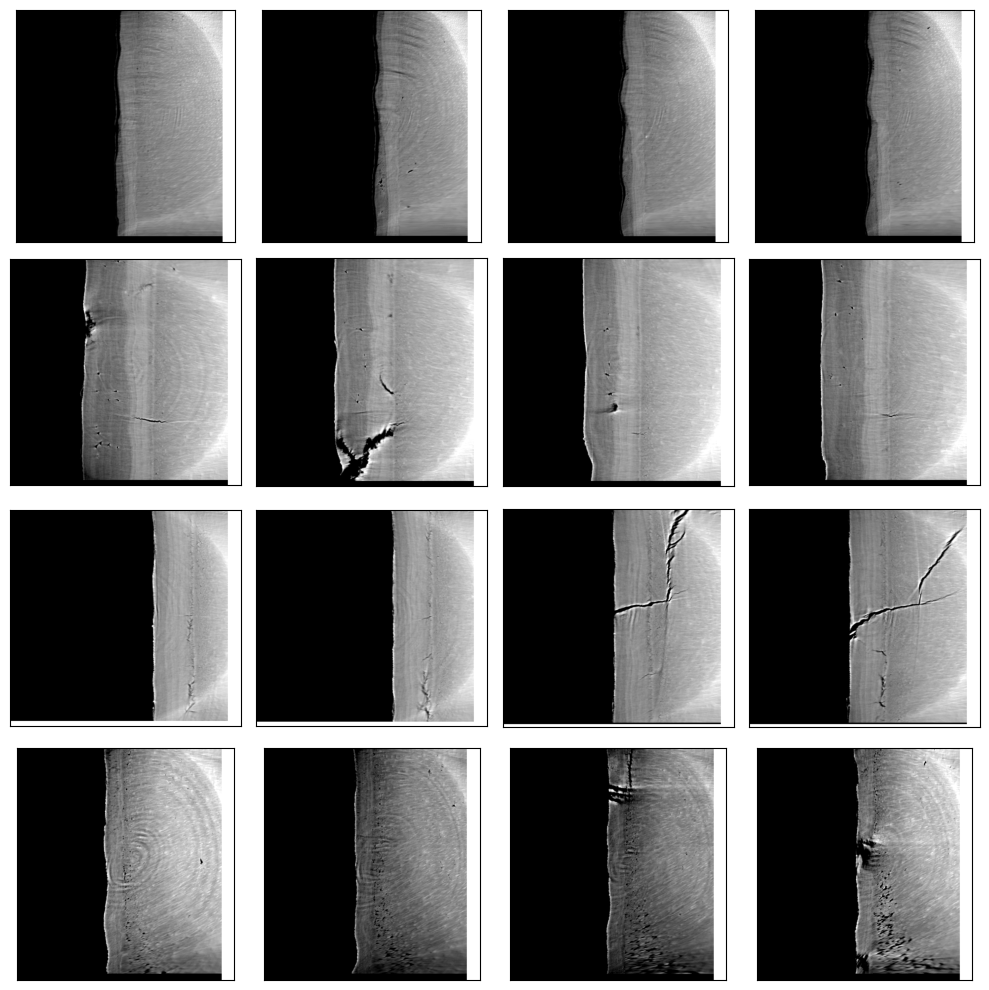

In [8]:
fig, axes = plt.subplots(n_imgs, 4, figsize=(10, 10))

for axis, straight_image in zip(axes.flat, straight_images):
    axis.imshow(straight_image, cmap="grey")
    axis.set_xticks([])
    axis.set_yticks([])

fig.tight_layout()

/home/mh19137/cementum/cementum/straighten.py:531: UserWarning: Temporary solution: removing 76 saturated columns from right
  warnings.warn(
/home/mh19137/cementum/cementum/straighten.py:531: UserWarning: Temporary solution: removing 78 saturated columns from right
  warnings.warn(
/home/mh19137/cementum/cementum/straighten.py:531: UserWarning: Temporary solution: removing 74 saturated columns from right
  warnings.warn(
/home/mh19137/cementum/cementum/straighten.py:531: UserWarning: Temporary solution: removing 25 saturated columns from right
  warnings.warn(
/home/mh19137/cementum/cementum/straighten.py:531: UserWarning: Temporary solution: removing 30 saturated columns from right
  warnings.warn(
/home/mh19137/cementum/cementum/straighten.py:531: UserWarning: Temporary solution: removing 29 saturated columns from right
  warnings.warn(
/home/mh19137/cementum/cementum/straighten.py:531: UserWarning: Temporary solution: removing 26 saturated columns from right
  warnings.warn(
/home/

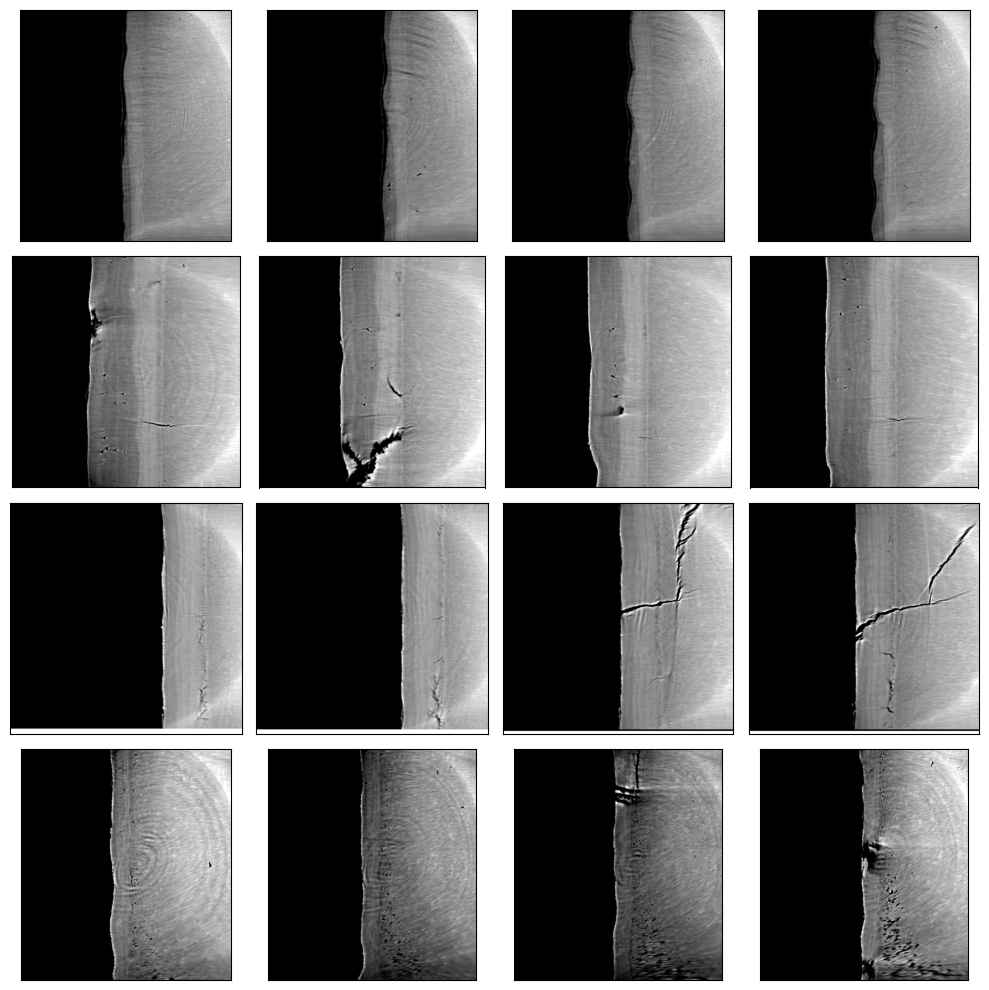

In [9]:
"""
Remove white columns and black rows

"""
straight_images = [straighten.remove_white_cols(image, image)[0] for image in straight_images]
straight_images = [straighten.remove_padding(image) for image in straight_images]

fig, axes = plt.subplots(n_imgs, 4, figsize=(10, 10))

for axis, straight_image in zip(axes.flat, straight_images):
    axis.imshow(straight_image, cmap="grey")
    axis.set_xticks([])
    axis.set_yticks([])

fig.tight_layout()

In [1]:
"""
Isolate cementum

"""
from cementum import fit_cementum

avg_intensities = [np.mean(image, axis=0) for image in straight_images]

fig, axes = plt.subplots(n_imgs, 4, figsize=(10, 10))

for axis, avg_intensity, image in tqdm(zip(axes.flat, avg_intensities, straight_images)):
    axis.plot(avg_intensity)
    axis.set_xticks([])
    axis.set_yticks([])

NameError: name 'straight_images' is not defined

In [11]:
"""
Contrast adjustment

"""

'\nContrast adjustment\n\n'

In [12]:
"""
Ridge detection

"""

'\nRidge detection\n\n'